In [1]:
import tensorflow as tf

In [2]:
#　バージョン確認
print(tf.__version__)

2.2.0


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# ニューラルネットワークモデルの構築

1. データセットの準備

2. モデルの構築

3. モデルの学習

4. 学習済みモデルの精度を評価

5. 学習済みモデルを用いて推論

In [4]:
# データの読み込み
df = pd.read_csv('wine_class.csv')

In [5]:
# データの表示（先頭３件）
df.head(3)

,Class,Alcohol,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Color intensity,Hue,Proline
0,1,14.23,2.43,15.6,127,2.80,3.06,0.28,5.64,1.04,1065
1,1,13.20,2.14,11.2,100,2.65,2.76,0.26,4.38,1.05,1050
2,1,13.16,2.67,18.6,101,2.80,3.24,0.30,5.68,1.03,1185


ワイン等級を正解データとする

In [7]:
# 目的変数
t = df['Class']
# 入力変数
x = df.drop('Class', axis=1)

In [8]:
x.head(3)

,Alcohol,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Color intensity,Hue,Proline
0,14.23,2.43,15.6,127,2.80,3.06,0.28,5.64,1.04,1065
1,13.20,2.14,11.2,100,2.65,2.76,0.26,4.38,1.05,1050
2,13.16,2.67,18.6,101,2.80,3.24,0.30,5.68,1.03,1185


In [9]:
t.head(3)

0    1
1    1
2    1
Name: Class, dtype: int64

In [10]:
# 形の確認
x.shape, t.shape

((178, 10), (178,))

In [14]:
# PandasのDataFrame
type(x)

pandas.core.frame.DataFrame

In [13]:
# NumPyに変換
type(x.values)

numpy.ndarray

In [15]:
# ユニークな値を確認
np.unique(t)

array([1, 2, 3])

In [16]:
# ラベルを 0 から始める (NumPyのブロードキャスト)
t = t.values - 1
x = x.values

In [17]:
t, type(t)

(array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2]),
 numpy.ndarray)

In [18]:
x, type(x)

(array([[1.423e+01, 2.430e+00, 1.560e+01, ..., 5.640e+00, 1.040e+00,
         1.065e+03],
        [1.320e+01, 2.140e+00, 1.120e+01, ..., 4.380e+00, 1.050e+00,
         1.050e+03],
        [1.316e+01, 2.670e+00, 1.860e+01, ..., 5.680e+00, 1.030e+00,
         1.185e+03],
        ...,
        [1.327e+01, 2.260e+00, 2.000e+01, ..., 1.020e+01, 5.900e-01,
         8.350e+02],
        [1.317e+01, 2.370e+00, 2.000e+01, ..., 9.300e+00, 6.000e-01,
         8.400e+02],
        [1.413e+01, 2.740e+00, 2.450e+01, ..., 9.200e+00, 6.100e-01,
         5.600e+02]]),
 numpy.ndarray)

In [19]:
from sklearn.model_selection import train_test_split

# 学習データとテストデータの分割
x_train, x_test, t_train, t_test = train_test_split(x, t, train_size=0.7, random_state=0)

In [20]:
x_train.shape, x_train.dtype, x_test.shape, x_test.dtype

((124, 10), dtype('float64'), (54, 10), dtype('float64'))

In [21]:
t_train.shape, t_train.dtype, t_test.shape, t_test.dtype

((124,), dtype('int64'), (54,), dtype('int64'))

In [22]:
# 32 bit にキャスト(データ型の変更)
x_train = np.array(x_train, np.float32)
x_test = np.array(x_train, np.float32)
t_train = np.array(t_train, np.int32)
t_test = np.array(t_train, np.int32)

In [23]:
x_train.shape, x_train.dtype, x_test.shape, x_test.dtype

((124, 10), dtype('float32'), (124, 10), dtype('float32'))

In [24]:
t_train.shape, t_train.dtype, t_test.shape, t_test.dtype

((124,), dtype('int32'), (124,), dtype('int32'))

# モデルの定義

1. 'tf.keras.models.Sequential()' を用意する
2. 内部に 'tf.keras.layers.層の名前()' を積み重ねて記述する
3. 変数 (model) に渡してインスタンス化を行う

'tf.keras.layers.層の名前()'の部分で全結合層(Dense)や活性化関数(Activation)などを追加する

モデル構築の前に、乱数のシードを固定
Python の乱数、random 関数、 numpy そして tensorflow を固定
乱数が固定され、CPU であれば再現性の確保が可能

In [25]:
import os, random

def reset_seed(seed=0):
    os.environ['PYTHONHASHSEED'] = '0'
    random.seed(seed) # random関数のシードを固定
    np.random.seed(seed) # numpyのシードを固定
    tf.random.set_seed(seed) # tensorflowのシードを固定

モデルの構築に頻出のコード

tensorflow.keras.models : モデルインスタンスの立ち上げやモデルの保存を担当

tensorflow.keras.layers : 全結合層 (Dense) などニューラルネットワークの層 (layer) の定義を担当

models.Sequential 内に定義したい層をリスト形式で導入
.add()を利用することもできる

全結合層: layers.Dense()

layers.Dense(units, activation, input_shape)
1. units : 出力の次元数
2. activation : 使用する活性化関数
3. input_shape : 入力の次元数

In [26]:
from tensorflow.keras import models, layers

In [27]:
# シードの固定
reset_seed(0)

# モデルの構築
model = models.Sequential([
    layers.Dense(units=10, activation='relu', input_shape=(10,)),
    layers.Dense(units=3, activation='softmax')
])

In [28]:
'''.add()メソッドを利用した場合'''

# モデルの構築
# model = models.Sequential()
# model.add(layers.Dense(units=10, activation='relu', input_shape=(10,)))
# model.add(layers.Dense(units=3, activation='softmax'))

'.add()メソッドを利用した場合'

# 学習プロセスの定義

学習に必要な目的関数や最適化手法などの詳細設定
Keras では

model.compile()

で学習プロセスを構成、3 つの重要な引数を取得


1. optimizer：最適化手法を指定

    - tf.keras.optimizers モジュールからインスタンスを渡す
    - eg. SGD, Adam

2. loss：目的関数を指定

    - tf.keras.losses モジュールからインスタンスを渡す
    - 回帰：MeanSquaredError : MSE (平均ニ乗誤差)
    - 分類：SparseCategoricalCrossentropy or BinaryCrossentropy (クロスエントロピー)

3. metrics：学習中にモニタリングする評価指標を指定
    - tf.keras.metrics モジュールからインスタンスを渡す
    - 回帰：MeanAbsoluteError(平均絶対値誤差)
    - 分類：Accuracy(正解率)

Tutorialでは
- optimizer : SGD
- loss : SparseCategoricalCrossentropy
- metrics : Accuracy

を使用

In [29]:
# モデルのコンパイル
model.compile(optimizer='sgd',
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])

# こちらでも同じ
# model.compile(optimizer=tf.keras.optimizers.SGD(),
#                loss=tf.keras.losses.SparseCategoricalCrossentropy(),
#                metrics=[tf.keras.metrics.Accuracy()])

# モデルの学習
model.fitを利用

1. epochs：入力データ全体に対する 1 つの反復回数を指定します
2. batch_size：データをバッチにスライスし、バッチごとに反復処理されます。その各バッチのサイズを指定します
3. validation_data：検証データのパフォーマンスをモニタリングするために、(入力値, 目標値) のタプルを渡すと各エポック終わりに渡された推論モードで loss と metrics の値を表示します

In [30]:
# モデルの学習
history = model.fit(x_train, t_train,
          batch_size=10,
          epochs=10,
          validation_data=(x_test, t_test))

Epoch 1/10
13/13 [==============================] - 0s 11ms/step - loss: 494.3857 - accuracy: 0.2984 - val_loss: 1.0982 - val_accuracy: 0.3952
Epoch 2/10
13/13 [==============================] - 0s 3ms/step - loss: 1.0982 - accuracy: 0.3952 - val_loss: 1.0971 - val_accuracy: 0.3952
Epoch 3/10
13/13 [==============================] - 0s 3ms/step - loss: 1.0972 - accuracy: 0.3952 - val_loss: 1.0966 - val_accuracy: 0.3952
Epoch 4/10
13/13 [==============================] - 0s 3ms/step - loss: 1.0967 - accuracy: 0.3952 - val_loss: 1.0962 - val_accuracy: 0.3952
Epoch 5/10
13/13 [==============================] - 0s 3ms/step - loss: 1.0964 - accuracy: 0.3952 - val_loss: 1.0955 - val_accuracy: 0.3952
Epoch 6/10
13/13 [==============================] - 0s 3ms/step - loss: 1.0955 - accuracy: 0.3952 - val_loss: 1.0949 - val_accuracy: 0.3952
Epoch 7/10
13/13 [==============================] - 0s 3ms/step - loss: 1.0948 - accuracy: 0.3952 - val_loss: 1.0945 - val_accuracy: 0.3952
Epoch 8/10
13/13 

In [31]:
# 学習過程
history.history

{'loss': [494.3856506347656,
  1.0981626510620117,
  1.0972340106964111,
  1.0966664552688599,
  1.0963795185089111,
  1.0955145359039307,
  1.094819188117981,
  1.0944644212722778,
  1.0941150188446045,
  1.0940911769866943],
 'accuracy': [0.2983871102333069,
  0.39516130089759827,
  0.39516130089759827,
  0.39516130089759827,
  0.39516130089759827,
  0.39516130089759827,
  0.39516130089759827,
  0.39516130089759827,
  0.39516130089759827,
  0.39516130089759827],
 'val_loss': [1.098228096961975,
  1.0971368551254272,
  1.096636414527893,
  1.09623122215271,
  1.0955188274383545,
  1.0949188470840454,
  1.0944960117340088,
  1.0941643714904785,
  1.0938093662261963,
  1.0934256315231323],
 'val_accuracy': [0.39516130089759827,
  0.39516130089759827,
  0.39516130089759827,
  0.39516130089759827,
  0.39516130089759827,
  0.39516130089759827,
  0.39516130089759827,
  0.39516130089759827,
  0.39516130089759827,
  0.39516130089759827]}

In [33]:
# Pandas 形式に変換
result = pd.DataFrame(history.history)
result.head()

,loss,accuracy,val_loss,val_accuracy
0,494.385651,0.298387,1.098228,0.395161
1,1.098163,0.395161,1.097137,0.395161
2,1.097234,0.395161,1.096636,0.395161
3,1.096666,0.395161,1.096231,0.395161
4,1.096380,0.395161,1.095519,0.395161


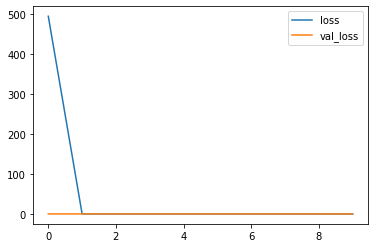

In [34]:
# 目的関数の値 (pandasの内部のmetplotlibを利用)
result[['loss', 'val_loss']].plot();

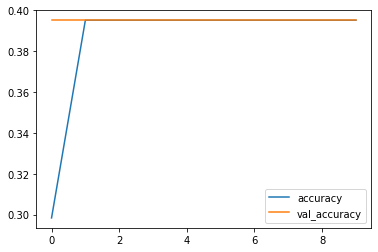

In [35]:
# 正解率
result[['accuracy', 'val_accuracy']].plot();

モデル精度の向上
- バッチノーマリゼーション

ミニバッチごとの平均と標準偏差を求め、標準化を行う

tf.keras.layers.BatchNormalizationで適用

In [36]:
# シードの固定
reset_seed(0)

# モデルの構築
model = tf.keras.models.Sequential([
    tf.keras.layers.BatchNormalization(input_shape=(10,)),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

# モデルのコンパイル
model.compile(optimizer='sgd',
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])

# モデルの学習
history = model.fit(x_train, t_train,
          batch_size=10,
          epochs=50,
          validation_data=(x_test, t_test))

Epoch 1/50
13/13 [==============================] - 0s 14ms/step - loss: 1.1147 - accuracy: 0.4113 - val_loss: 6.6567 - val_accuracy: 0.2823
Epoch 2/50
13/13 [==============================] - 0s 3ms/step - loss: 0.9663 - accuracy: 0.5242 - val_loss: 4.8539 - val_accuracy: 0.4194
Epoch 3/50
13/13 [==============================] - 0s 3ms/step - loss: 0.8845 - accuracy: 0.6371 - val_loss: 4.2069 - val_accuracy: 0.5968
Epoch 4/50
13/13 [==============================] - 0s 3ms/step - loss: 0.7976 - accuracy: 0.6452 - val_loss: 3.8261 - val_accuracy: 0.5968
Epoch 5/50
13/13 [==============================] - 0s 3ms/step - loss: 0.7996 - accuracy: 0.6774 - val_loss: 3.5485 - val_accuracy: 0.5887
Epoch 6/50
13/13 [==============================] - 0s 3ms/step - loss: 0.6504 - accuracy: 0.8065 - val_loss: 3.2491 - val_accuracy: 0.5806
Epoch 7/50
13/13 [==============================] - 0s 3ms/step - loss: 0.5695 - accuracy: 0.8548 - val_loss: 2.9814 - val_accuracy: 0.5726
Epoch 8/50
13/13 [=

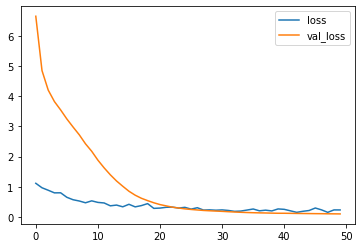

In [37]:
# 正解率と損失を Pandas の形式に変換
result_batchnorm = pd.DataFrame(history.history)

# 目的関数の値
result_batchnorm[['loss', 'val_loss']].plot();

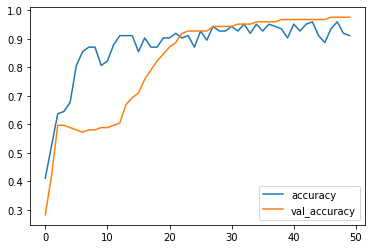

In [38]:
# 正解率
result_batchnorm[['accuracy', 'val_accuracy']].plot();

# 学習済みモデルの保存と推論
- 高レベル API：model.save & tf.keras.models.load_model
- 低レベル API：tf.saved_model.save & tf.saved_model.load

学習済みモデルには、save メソッドが付属

model.save(filepath, save_format)を指定
- filepath : 保存するファイルの場所と名前を指定
- save_format : HDF5 か Saved Model のどちらかかを指定


In [39]:
# モデルの保存
model.save(filepath='wine_model.h5', save_format='h5')

In [40]:
# モデルの読み込み
loaded_model = tf.keras.models.load_model('wine_model.h5')

In [41]:
# データの準備
sample = x_train[0]
sample.shape

(10,)

In [42]:
# 予測値の計算
loaded_model.predict(sample)

ValueError: in user code:

    /Users/yutaro/miniconda3/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:1147 predict_function  *
        outputs = self.distribute_strategy.run(
    /Users/yutaro/miniconda3/lib/python3.7/site-packages/tensorflow/python/distribute/distribute_lib.py:951 run  **
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    /Users/yutaro/miniconda3/lib/python3.7/site-packages/tensorflow/python/distribute/distribute_lib.py:2290 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    /Users/yutaro/miniconda3/lib/python3.7/site-packages/tensorflow/python/distribute/distribute_lib.py:2649 _call_for_each_replica
        return fn(*args, **kwargs)
    /Users/yutaro/miniconda3/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:1122 predict_step  **
        return self(x, training=False)
    /Users/yutaro/miniconda3/lib/python3.7/site-packages/tensorflow/python/keras/engine/base_layer.py:886 __call__
        self.name)
    /Users/yutaro/miniconda3/lib/python3.7/site-packages/tensorflow/python/keras/engine/input_spec.py:216 assert_input_compatibility
        ' but received input with shape ' + str(shape))

    ValueError: Input 0 of layer sequential_1 is incompatible with the layer: expected axis 1 of input shape to have value 10 but received input with shape [None, 1]


推論で使用する際には、(バッチサイズ, 入力変数の数) という形式となっていないと上記のようなエラーが起きる

In [43]:
# 形を変換
sample = sample.reshape(1, 10)
sample.shape

(1, 10)

In [44]:
# 予測値の計算
y = loaded_model.predict(sample)
y

array([[0.9737636 , 0.00732896, 0.01890746]], dtype=float32)

In [45]:
# 最も値の大きなラベルを取得
np.argmax(y)

0

In [46]:
# 正解ラベル
t_train[0]

0